In [1]:
# Import all library.

import ROOT
import numpy as np
import matplotlib.pyplot as plt
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes


ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

print "ok!"

ok!


In [2]:
# Confirm our array shape
path = "/home/micael/MyWorkspace/DATA"
data = np.load(path+"/"+"lvbb125Array.npy")
data_target = data[:,[12]]

data_inputs = data[:,:12]
data_inputs_noPtRel = data[:,:11]
print data.shape
data

(191100, 13)


array([[  9.52196307e-03,   6.12077856e-05,   1.65209174e-02, ...,
          9.21870469e+01,   5.98104895e+01,   6.10195977e+01],
       [  1.67018827e-02,   1.13179535e-01,   9.47747454e-02, ...,
          1.07602320e+02,   5.98104895e+01,   6.44654687e+01],
       [  8.95111356e-03,   9.14592529e-05,   8.82276613e-03, ...,
          3.70010500e+02,   4.97765697e+01,   1.06724656e+02],
       ..., 
       [  1.62160210e-02,   5.48769441e-03,   2.28184238e-02, ...,
          3.86259570e+01,   3.57536859e+01,   3.39022539e+01],
       [  1.42509257e-02,   1.21706940e-01,   4.58930284e-02, ...,
          1.07292875e+02,   5.50991584e+01,   9.68779375e+01],
       [  1.58070903e-02,   4.79239076e-02,   1.20003656e-01, ...,
          6.82103906e+01,   5.50991584e+01,   5.35117266e+01]])

In [3]:
print data_inputs.shape
data_inputs

(191100, 12)


array([[  9.52196307e-03,   6.12077856e-05,   1.65209174e-02, ...,
         -1.83297706e+00,   9.21870469e+01,   5.98104895e+01],
       [  1.67018827e-02,   1.13179535e-01,   9.47747454e-02, ...,
          1.78017831e+00,   1.07602320e+02,   5.98104895e+01],
       [  8.95111356e-03,   9.14592529e-05,   8.82276613e-03, ...,
          5.18436611e-01,   3.70010500e+02,   4.97765697e+01],
       ..., 
       [  1.62160210e-02,   5.48769441e-03,   2.28184238e-02, ...,
         -2.27387905e+00,   3.86259570e+01,   3.57536859e+01],
       [  1.42509257e-02,   1.21706940e-01,   4.58930284e-02, ...,
         -1.46886933e+00,   1.07292875e+02,   5.50991584e+01],
       [  1.58070903e-02,   4.79239076e-02,   1.20003656e-01, ...,
         -3.02542996e+00,   6.82103906e+01,   5.50991584e+01]])

In [4]:
print data_target.shape
data_target

(191100, 1)


array([[  61.01959766],
       [  64.46546875],
       [ 106.72465625],
       ..., 
       [  33.90225391],
       [  96.8779375 ],
       [  53.51172656]])

In [5]:
# Train NN
#from Functions import LogFunctions as log
from sklearn import cross_validation
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.callbacks as callbacks
from keras.utils import np_utils

from datetime import datetime  
from datetime import timedelta 
import random


test_id= random.sample(range(data_inputs.shape[0]),int(np.floor(0.1*data_target.shape[0])))
lista_id = np.asarray(range(0, data_inputs.shape[0]))
all_id = np.ndarray.tolist(lista_id)
train_id = list(set(lista_id) - set(test_id))

scaler = preprocessing.StandardScaler().fit(data_inputs[train_id,:])
scaler_noPtRel = preprocessing.StandardScaler().fit(data_inputs_noPtRel[train_id,:])

[freq, target_values] = np.histogram(data_target[train_id],
             bins=np.linspace(data_target[train_id].min(),data_target[train_id].max(),50))

MOP = target_values[np.argmax(freq)]

print "OK!", MOP

Using Theano backend.
Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)


OK! 46.6801470424


In [6]:
from keras.models import load_model
model=load_model(path+"/NN_outputs/"+"Modelv6.h5")
modelNOPTREL=load_model(path+"/NN_outputs/"+"ModelvNOPTREL.h5")
print "Model LOAD!"

Model LOAD!


In [7]:

#processes = "lvbb125,TTbar,Wbb,Wbl,Wll,Wcl,Wcc,WW,WZ,ZZ"
processes = "lvbb125"
output = "/home/micael/MyWorkspace/DATA"

data_path = "/home/micael/MyWorkspace/DATA"

# for histograms
bins = 60
m_max = 300
m_min = 0

ylabel = "Occurrences"

# Use Colors
list_color = []
list_color.append(ROOT.kBlue) # For truth
list_color.append(ROOT.kRed) 
list_color.append(ROOT.kGreen)
#test two models
list_color.append(ROOT.kMagenta)
#list_color.append(ROOT.kRed+2)
#list_color.append(ROOT.kRed+3)
#list_color.append(ROOT.kRed+4)
#end list of colors

#  Make a list of mass histogram
list_inf_M = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth Mass ","h_lvbb_M_truth",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("Reco Mass ","h_lvbb_M_reco",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("NN Mass ","h_lvbb_M_NN",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

hist_inf = HistogramFunctions.OneDimHistInfo("NNnoPtRel Mass ","h_lvbb_M_NNnoPtRel",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

list_hist_M = HistogramFunctions.CreateListOf1DHistograms(list_inf_M,list_color)

c = rootnotes.canvas("c", (800, 600))

list_hist_M

[<ROOT.TH1F object ("h_lvbb_M_truth") at 0xb939420>,
 <ROOT.TH1F object ("h_lvbb_M_reco") at 0xb93a370>,
 <ROOT.TH1F object ("h_lvbb_M_NN") at 0xb93a9f0>,
 <ROOT.TH1F object ("h_lvbb_M_NNnoPtRel") at 0xb93b0c0>]

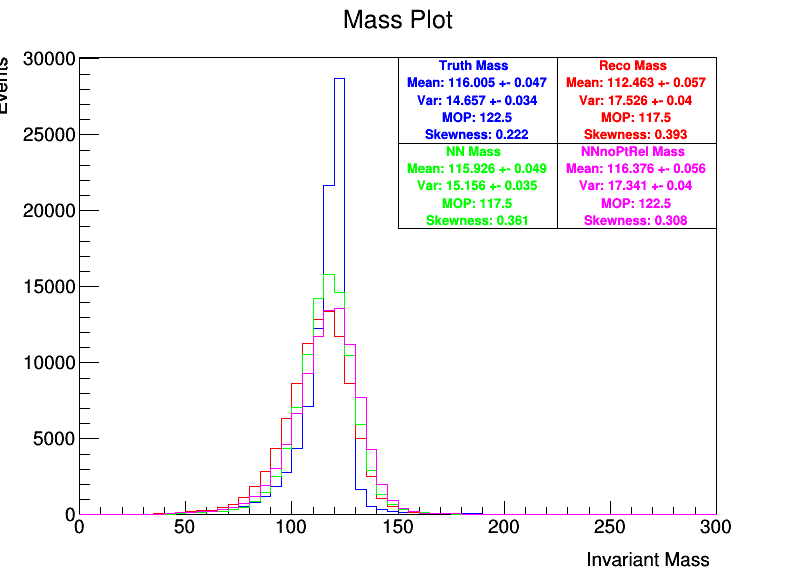

In [8]:
data_input = data_path+"/"+"lvbb125.root"
treeName = "perevent"
file = ROOT.TFile(data_input,"READ")
tree = file.Get(treeName)
nrEvents = tree.GetEntries()
#nrEvents = 4

#Corrections = ["GENWZ","EMJESGSCMu"]
#for (j,Correction) in enumerate(Corrections):   
#    for (i,entry) in enumerate(tree):
#        if Correction == "GENWZ":
#            list_hist_M[0].Fill(getattr(entry,"j1j2_"+Correction+"_M"))
#        else:
#            list_hist_M[1].Fill(getattr(entry,"j1j2_"+Correction+"_M"))
#        
#    for (i,entry) in enumerate(tree):
#        if nrEvents>0:
#            if i>nrEvents:
#                break
#        if Correction == "GENWZ":
#            continue
#        else:
    
for (i,entry) in enumerate(tree):
    if nrEvents>0:
        if i>nrEvents:
            break
            # ==== Trtuh ======== #  
        j1Truth_LV = ROOT.TLorentzVector()
        j2Truth_LV = ROOT.TLorentzVector()
        
        j1Truth_pt = tree.j1_GENWZ_Pt
        j1Truth_phi = tree.j1_GENWZ_Phi
        j1Truth_eta = tree.j1_GENWZ_Eta
        j1Truth_e = tree.j1_GENWZ_E
            
        j2Truth_pt = tree.j2_GENWZ_Pt
        j2Truth_phi = tree.j2_GENWZ_Phi
        j2Truth_eta = tree.j2_GENWZ_Eta
        j2Truth_e = tree.j2_GENWZ_E
            
        j1Truth_LV.SetPtEtaPhiE(j1Truth_pt,j1Truth_eta,j1Truth_phi,j1Truth_e)
        j2Truth_LV.SetPtEtaPhiE(j2Truth_pt,j2Truth_eta,j2Truth_phi,j2Truth_e)
            
        dijetTruth_LV = j1Truth_LV + j2Truth_LV
        MassTruth = dijetTruth_LV.M()
            
            #====== Reco =========
        j1Reco_LV = ROOT.TLorentzVector()
        j2Reco_LV = ROOT.TLorentzVector()
        
        j1_pt = tree.j1_EMJESGSCMu_Pt
        j1_phi = tree.j1_EMJESGSCMu_Phi
        j1_eta = tree.j1_EMJESGSCMu_Eta
        j1_e = tree.j1_EMJESGSCMu_E
            
        j2_pt = tree.j2_EMJESGSCMu_Pt
        j2_phi = tree.j2_EMJESGSCMu_Phi
        j2_eta = tree.j2_EMJESGSCMu_Eta
        j2_e = tree.j2_EMJESGSCMu_E
            
        j1Reco_LV.SetPtEtaPhiE(j1_pt,j1_eta,j1_phi,j1_e)
        j2Reco_LV.SetPtEtaPhiE(j2_pt,j2_eta,j2_phi,j2_e)
            
        dijetReco_LV = j1Reco_LV + j2Reco_LV
        MassReco = dijetReco_LV.M()
        
            #========= NN =========
            
        j1_LV = ROOT.TLorentzVector()
        j2_LV = ROOT.TLorentzVector()
        
        j1_LVnoPtRel = ROOT.TLorentzVector()
        j2_LVnoPtRel = ROOT.TLorentzVector()
            
            #=============================================================================
            #=======================EMJESGSCMu========================================
            # variables for EMJESGSCMu j1.     
        E1_EMJESGSCMu = tree.j1_EMJESGSCMu_E
        Phi1_EMJESGSCMu = tree.j1_EMJESGSCMu_Phi
        Eta1_EMJESGSCMu = tree.j1_EMJESGSCMu_Eta
        Pt1_EMJESGSCMu = tree.j1_EMJESGSCMu_Pt
    
            # variables for EMJESGSCMu j2.     
        E2_EMJESGSCMu = tree.j2_EMJESGSCMu_E
        Phi2_EMJESGSCMu = tree.j2_EMJESGSCMu_Phi
        Eta2_EMJESGSCMu = tree.j2_EMJESGSCMu_Eta
        Pt2_EMJESGSCMu = tree.j2_EMJESGSCMu_Pt
    
            # PtRel in EMJESGSCMu
        Theta1_EMJESGSCMu = AuxiliarFunctions.theta(Eta1_EMJESGSCMu)
        Comp1_EMJESGSCMu = AuxiliarFunctions.Componets(E1_EMJESGSCMu,Eta1_EMJESGSCMu,Phi1_EMJESGSCMu,Theta1_EMJESGSCMu)
        norm1_EMJESGSCMu = AuxiliarFunctions.norm(Comp1_EMJESGSCMu)

        Theta2_EMJESGSCMu = AuxiliarFunctions.theta(Eta2_EMJESGSCMu)
        Comp2_EMJESGSCMu = AuxiliarFunctions.Componets(E2_EMJESGSCMu,Eta2_EMJESGSCMu,Phi2_EMJESGSCMu,Theta2_EMJESGSCMu)
        norm2_EMJESGCMu = AuxiliarFunctions.norm(Comp2_EMJESGSCMu)
    
            # sum of components.
        Comp3_EMJESGSCMu = AuxiliarFunctions.somaComponents(Comp1_EMJESGSCMu,Comp2_EMJESGSCMu)
        norm3_EMJESGSCMu = AuxiliarFunctions.norm(Comp3_EMJESGSCMu)
        numerador1_EMJESGSCMu = AuxiliarFunctions.numerador(Comp1_EMJESGSCMu,Comp3_EMJESGSCMu)    
        angle1_EMJESGSCMu = AuxiliarFunctions.alpha(numerador1_EMJESGSCMu,norm1_EMJESGSCMu,norm3_EMJESGSCMu)
    
            #compute Relative Pt
        PtRel_j1_EMJESGSCMu = AuxiliarFunctions.PtRelative(E1_EMJESGSCMu,angle1_EMJESGSCMu)
    
        j1_FracEM3 = tree.j1_FracEM3
        j1_FracTile0 = tree.j1_FracTile0
        j1_TrkWidth = tree.j1_TrkWidth
        j1_EMF = tree.j1_EMF
        j1_JVF = tree.j1_JVF
        j1_NTrk = tree.j1_NTrk 
        j1_SumPtTrk = tree.j1_SumPtTrk
            # only for EM and j2.
        j2_FracEM3 = tree.j2_FracEM3
        j2_FracTile0 = tree.j2_FracTile0
        j2_TrkWidth = tree.j2_TrkWidth
        j2_EMF = tree.j2_EMF
        j2_JVF = tree.j2_JVF
        j2_NTrk = tree.j2_NTrk 
        j2_SumPtTrk = tree.j2_SumPtTrk
    
        # Create a numpy array with all data and normalize then
        # ========= with PtRel =================
        j1 = np.array([j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk,
                              j1_SumPtTrk, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, 
                              E1_EMJESGSCMu, PtRel_j1_EMJESGSCMu])
        
        V_j1 = np.reshape(j1, (1,12))
        norm_j1_data = scaler.transform(V_j1)
            
        j2 = np.array([j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk,
                             j2_SumPtTrk, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,
                             E2_EMJESGSCMu, PtRel_j1_EMJESGSCMu])
        
        V_j2 = np.reshape(j2, (1,12))
        norm_j2_data = scaler.transform(V_j2)
        
        # ========= without PtRel ==============
        
        j1noPtRel = np.array([j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk,
                              j1_SumPtTrk, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, 
                              E1_EMJESGSCMu])
        
        V_j1noPtRel = np.reshape(j1noPtRel, (1,11))
        norm_j1noPtRel_data = scaler_noPtRel.transform(V_j1noPtRel)
            
        j2noPtRel = np.array([j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk,
                             j2_SumPtTrk, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,
                             E2_EMJESGSCMu])
        
        V_j2noPtRel = np.reshape(j2noPtRel, (1,11))
        norm_j2noPtRel_data = scaler_noPtRel.transform(V_j2noPtRel)
        
        # ========= end ==========
        # ========= Predict in two models =======
        Pt1_cor = model.predict(norm_j1_data, batch_size=8, verbose=0)*MOP
        Pt2_cor = model.predict(norm_j2_data, batch_size=8, verbose=0)*MOP
        
        Pt1noPtRel_cor = modelNOPTREL.predict(norm_j1noPtRel_data, batch_size=8, verbose=0)*MOP
        Pt2noPtRel_cor = modelNOPTREL.predict(norm_j2noPtRel_data, batch_size=8, verbose=0)*MOP
        
        # ========== end ==========
        # ========== Set the LorentzVectors ============
        
        j1_LV.SetPtEtaPhiE((Pt1_cor/Pt1_EMJESGSCMu)*Pt1_EMJESGSCMu,
                           Eta1_EMJESGSCMu, Phi1_EMJESGSCMu,(Pt1_cor/Pt1_EMJESGSCMu)*E1_EMJESGSCMu)
        j2_LV.SetPtEtaPhiE((Pt2_cor/Pt2_EMJESGSCMu)*Pt2_EMJESGSCMu,
                           Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,(Pt2_cor/Pt2_EMJESGSCMu)*E2_EMJESGSCMu)
        
        # ========= Withou PtRel =============
        
        j1_LVnoPtRel.SetPtEtaPhiE((Pt1noPtRel_cor/Pt1_EMJESGSCMu)*Pt1_EMJESGSCMu,
                           Eta1_EMJESGSCMu, Phi1_EMJESGSCMu,(Pt1noPtRel_cor/Pt1_EMJESGSCMu)*E1_EMJESGSCMu)
        j2_LVnoPtRel.SetPtEtaPhiE((Pt2noPtRel_cor/Pt2_EMJESGSCMu)*Pt2_EMJESGSCMu,
                           Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,(Pt2noPtRel_cor/Pt2_EMJESGSCMu)*E2_EMJESGSCMu)
        
        # ========= end ===============
        # ========= extract the dijet Mass ==========
        
        dijet_LV = j1_LV + j2_LV
        MassNN = dijet_LV.M()
        
        dijet_LVnoPtRel = j1_LVnoPtRel + j2_LVnoPtRel
        MassNNnoPtRel = dijet_LVnoPtRel.M()
        
        # ========= end ===========
        # ========= Fill the Mass Histogram ======
        list_hist_M[0].Fill(MassTruth)
        list_hist_M[1].Fill(MassReco)
        list_hist_M[2].Fill(MassNN)
        list_hist_M[3].Fill(MassNNnoPtRel)
clone_list_M = []
for hist in list_hist_M:
    newhist = hist.Clone()
    clone_list_M.append(newhist)
HistogramFunctions.Draw1DHists(list_hist_M,output)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_M, "Mass Plot", " Invariant Mass ", "Events", c)        

c

In [9]:
c.Print(path+'/'+'CompareMassv1.pdf')